In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data=pd.read_csv('drive/My Drive/FML/Data.csv')
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [17]:
X=data.iloc[:,[1]].values
X

array([[44.],
       [27.],
       [30.],
       [38.],
       [40.],
       [35.],
       [27.],
       [48.],
       [50.],
       [37.]])

In [18]:
Y=data.iloc[:,[2]].values
Y

array([[72000.],
       [48000.],
       [54000.],
       [61000.],
       [48000.],
       [58000.],
       [52000.],
       [79000.],
       [83000.],
       [67000.]])

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data[['Age','Salary']] = imputer.fit_transform(data[['Age','Salary']])
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,48000.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,27.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3.0,random_state=0)

In [21]:
from sklearn.preprocessing import StandardScaler #when numbers are in two  different levels-we use Standard Scaler to normalize data here age and salary
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [23]:
Y_pred=regressor.predict(X_test)
Y_pred

array([[52912.98527443],
       [79847.38955823],
       [66380.18741633],
       [62340.02677376]])

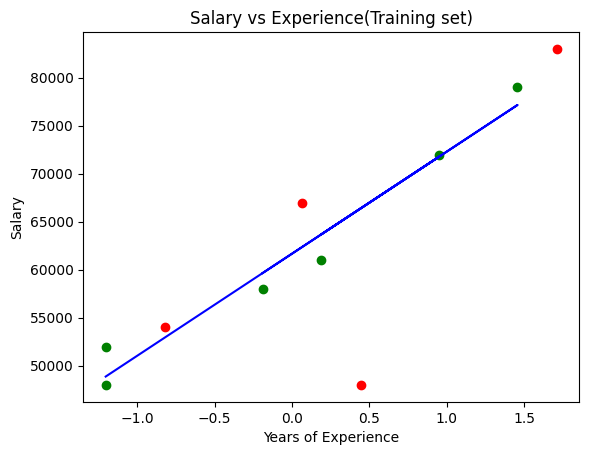

In [26]:
plt.scatter(X_train,Y_train,color='green')
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Salary vs Experience(Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

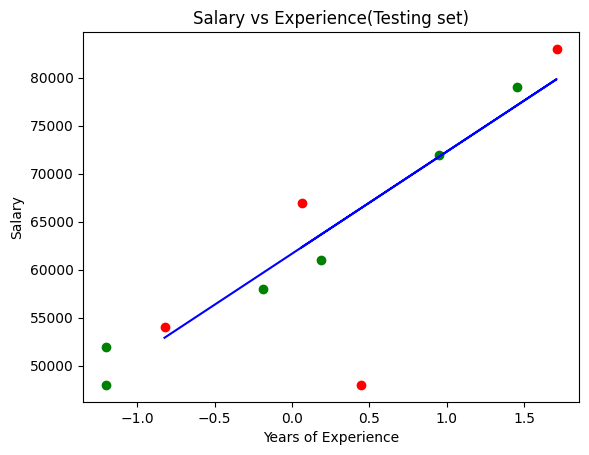

In [27]:
plt.scatter(X_train,Y_train,color='green')
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,regressor.predict(X_test),color='blue')
plt.title('Salary vs Experience(Testing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()